In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn import metrics

In [2]:
df_old = pd.read_excel('Train Data V3.xlsx', sheet_name = 'New train data')
df_old = df_old.replace({ "No" : False , "Yes" : True })
df_old.drop(columns = "policy_id", inplace = True)
#df_old.head()

In [4]:
df = df_old[['is_parking_camera',
'transmission_type',
'policy_tenure',
'new_area_cluster',
'is_day_night_rear_view_mirror',
'is_rear_window_wiper',
'age_of_policyholder',
'turning_radius',
'is_rear_window_defogger',
'cylinder',
'rear_brakes_type',
'new_make',
'is_power_steering',
'age_of_car',
'displacement',
'population_density',
'height',
'width',
'is_claim',]]

df = df.replace({ "Disc" : 0 , "Drum" : 1 })
df = df.replace({ "Manual" : 0 , "Automatic" : 1 })

#df

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df.drop('is_claim', axis = 1), 
                                                    df.is_claim, test_size=0.3, 
                                                    random_state=52)


## Decision Tree with All Variables, All Data

In [37]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 321)
basicFit = model.fit(X_train, y_train)

In [38]:
#model = DecisionTreeClassifier(max_depth = 3, random_state = 321)
#basicFit = model.fit(X_train, y_train)

[Text(0.46229328269110187, 0.9883720930232558, 'x[2] <= 0.588\ngini = 0.119\nsamples = 41014\nvalue = [38400, 2614]'),
 Text(0.13548904731688396, 0.9651162790697675, 'x[13] <= 0.005\ngini = 0.089\nsamples = 20929\nvalue = [19953, 976]'),
 Text(0.06877482886033914, 0.9418604651162791, 'x[14] <= 897.0\ngini = 0.186\nsamples = 2900\nvalue = [2599, 301]'),
 Text(0.040435419445276136, 0.9186046511627907, 'x[2] <= 0.067\ngini = 0.231\nsamples = 1948\nvalue = [1688, 260]'),
 Text(0.02350091183755682, 0.8953488372093024, 'x[2] <= 0.059\ngini = 0.175\nsamples = 639\nvalue = [577, 62]'),
 Text(0.015436457170853861, 0.872093023255814, 'x[2] <= 0.059\ngini = 0.195\nsamples = 549\nvalue = [489, 60]'),
 Text(0.015157734287814039, 0.8488372093023255, 'x[15] <= 17268.5\ngini = 0.192\nsamples = 548\nvalue = [489, 59]'),
 Text(0.006245134598110999, 0.8255813953488372, 'x[2] <= 0.058\ngini = 0.137\nsamples = 256\nvalue = [237, 19]'),
 Text(0.004163423065407333, 0.8023255813953488, 'x[6] <= 0.476\ngini = 

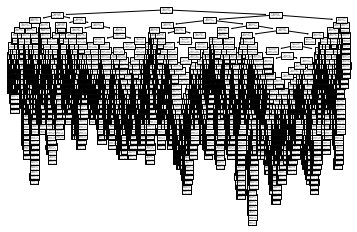

In [39]:
from sklearn import tree
tree.plot_tree(basicFit)


### Accuracy 

In [40]:
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)


0.8693821822732961

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

from sklearn.metrics import (roc_curve, auc, roc_auc_score,
                             confusion_matrix)
import matplotlib.pyplot as plt
import numpy as np
import itertools

### Cumulative Gains Curve

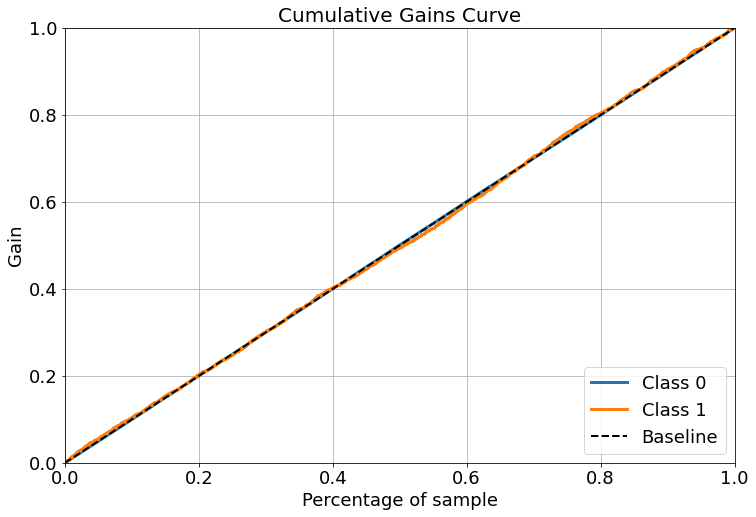

In [43]:
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(
    y_train, X_train, figsize=(12, 8), title_fontsize=20, text_fontsize=18
)
plt.show()

### REMOVING THE ROOT NODE FROM THE DECISION TREE

In [110]:
X_train1 = X_train.drop('policy_tenure', axis = 'columns')
X_test1 = X_test.drop('policy_tenure', axis='columns')
X_test1.head()

,is_parking_camera,transmission_type,new_area_cluster,is_day_night_rear_view_mirror,is_rear_window_wiper,age_of_policyholder,turning_radius,is_rear_window_defogger,cylinder,rear_brakes_type,new_make,is_power_steering,age_of_car,displacement,population_density,height,width
19547,False,0,0.900610,False,False,0.317308,5.0,False,4,1,0,True,0.04,1497,34738,1523,1755
28019,False,0,1.100191,False,False,0.567308,4.6,False,3,1,0,True,0.04,796,4076,1475,1515
52026,False,0,0.900610,False,False,0.490385,4.6,False,3,1,0,True,0.01,796,34738,1475,1515
1129,False,0,1.100191,True,False,0.538462,4.8,False,4,1,0,True,0.09,1197,8794,1530,1735
15122,False,0,1.216317,True,False,0.778846,4.8,False,4,1,0,True,0.15,1197,7788,1530,1735


In [117]:
model1 = DecisionTreeClassifier(random_state = 123)
basicFit_1 = model1.fit(X_train1, y_train)

[Text(0.5, 0.875, 'x[12] <= 0.005\ngini = 0.119\nsamples = 41014\nvalue = [38400, 2614]'),
 Text(0.25, 0.625, 'x[15] <= 1482.5\ngini = 0.189\nsamples = 3688\nvalue = [3299, 389]'),
 Text(0.125, 0.375, 'x[5] <= 0.486\ngini = 0.235\nsamples = 2384\nvalue = [2060, 324]'),
 Text(0.0625, 0.125, 'gini = 0.256\nsamples = 1312\nvalue = [1114, 198]'),
 Text(0.1875, 0.125, 'gini = 0.207\nsamples = 1072\nvalue = [946, 126]'),
 Text(0.375, 0.375, 'x[2] <= 1.0\ngini = 0.095\nsamples = 1304\nvalue = [1239, 65]'),
 Text(0.3125, 0.125, 'gini = 0.058\nsamples = 535\nvalue = [519, 16]'),
 Text(0.4375, 0.125, 'gini = 0.119\nsamples = 769\nvalue = [720, 49]'),
 Text(0.75, 0.625, 'x[2] <= 1.0\ngini = 0.112\nsamples = 37326\nvalue = [35101, 2225]'),
 Text(0.625, 0.375, 'x[12] <= 0.015\ngini = 0.09\nsamples = 15995\nvalue = [15237, 758]'),
 Text(0.5625, 0.125, 'gini = 0.057\nsamples = 2213\nvalue = [2148, 65]'),
 Text(0.6875, 0.125, 'gini = 0.096\nsamples = 13782\nvalue = [13089, 693]'),
 Text(0.875, 0.375, 

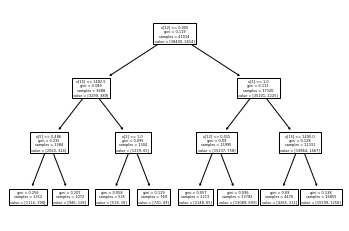

In [113]:
tree.plot_tree(basicFit_1)

In [116]:
y_pred1 = model.predict(X_test)
metrics.accuracy_score(y_test, y_pred1)


0.8693821822732961

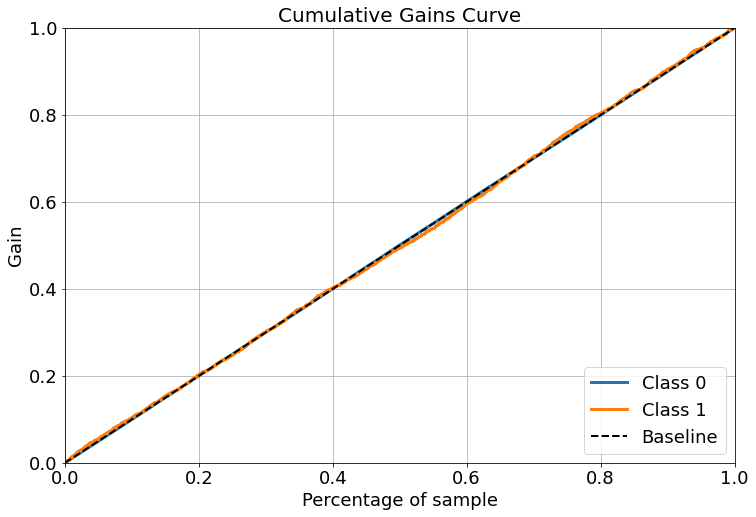

In [118]:
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(
    y_train, X_train1, figsize=(12, 8), title_fontsize=20, text_fontsize=18
)
plt.show()